# Law of Large Numbers Simulator

The following code demonstrates the Law of Large Numbers by simulating die rolls and tallying the number of times that a specified event occurs. 

To execute the code, click in the box and press 'Shift+Enter'. You will immediately be prompted for four things:

* Number of die sides (a standard die has 6 sides)
* Title of the event (e.g., Rolling a 5, Rolling an even, etc.)
* Event represented as a subset of the sample space (e.g. "Rolling an even"=[2,4,6])
* Number of trials in the experiment

By pressing enter for any of the input prompts the program will run with the default value for that prompt.

Enjoy!

How many sides on the die? (Default=6): 6
Label for Event: (Default='Rolling a 5'): Rolling an even
Event as subset of sample space, e.g., [1,2,6] (Default=[5]): [2,4,6]
Number of trials to run (Default=100): 
----------------------------------------------------------------------
Theoretical probability of Rolling an even = 0.5
----------------------------------------------------------------------
First 10 results:


,Result,Cumulative Tally,Ratio
1,2,1,1.000000
2,1,1,0.500000
3,1,1,0.333333
4,1,1,0.250000
5,6,2,0.400000
6,2,3,0.500000
7,1,3,0.428571
8,1,3,0.375000
9,4,4,0.444444
10,5,4,0.400000


----------------------------------------------------------------------
Last 10 results:


,Result,Cumulative Tally,Ratio
91,3,43,0.472527
92,6,44,0.478261
93,2,45,0.483871
94,3,45,0.478723
95,6,46,0.484211
96,4,47,0.489583
97,2,48,0.494845
98,6,49,0.500000
99,2,50,0.505051
100,3,50,0.500000


----------------------------------------------------------------------


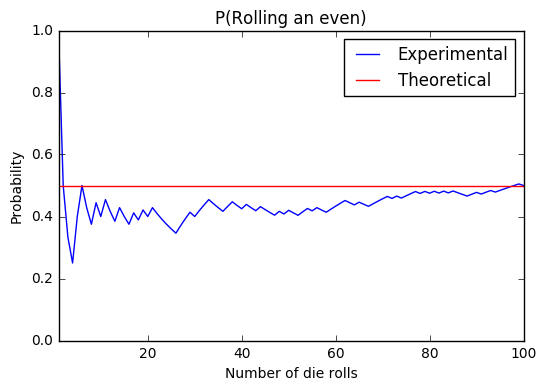

In [34]:
# Necessary Libraries
#------------------------------------------------------------------------------
import random
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

#------------------------------------------------------------------------------
# Helper functions to demonstrate the Law of Large Numbers
#------------------------------------------------------------------------------
def die_roll(sample_space):
    """Returns a random result (die roll) from the given sample space"""
    return random.choice(sample_space)

def experiment(n, sample_space):
    """Returns results of an experiment consisting of n trials"""
    return [die_roll(sample_space) for _ in range(n)]

def cumulative_tallies(experimental_values, event):
    """Returns a list such that for each die roll in experimental_values
    contains the number of times that event has thus far been satisfied
    """
    cumulative_tally = 0
    tallies = []
    for roll in experimental_values:
        if roll in event:
            cumulative_tally += 1
        tallies.append(cumulative_tally)
    return tallies

def experimental_probabilities(tallies):
    """Returns a list of experimental probabilities for die roll"""
    return [tally*1.0/(roll_count+1) for roll_count, tally in enumerate(tallies)]

def tabulate(results, tallies, ratios):
    return pd.DataFrame(list(zip(results, tallies, ratios)), 
                        columns=['Result', 'Cumulative Tally', 'Ratio'],
                        index=list(range(1, len(results)+1)))

def plot(probabilities, event_title, theoretical_probability=None):
    """Plots the probabilities as returned by experimental_probabilities.
    If theoretical_probability is used, a line for experimental probability 
    will be drawn.
    """
    n = len(probabilities)  # for range of x values
    plt.plot(range(1, n+1), probabilities, 'b', label="Experimental")
    if theoretical_probability:
        plt.plot((1, n), (theoretical_probability, theoretical_probability), 
                 'r', label="Theoretical")
        plt.legend()
    plt.xlim((1,n))
    plt.ylim((0,1))
    plt.title("P(%s)" % event_title)
    plt.xlabel("Number of die rolls")
    plt.ylabel("Probability")
    plt.show()


#------------------------------------------------------------------------------
# Code to demonstrate Law of Large Numbers
#------------------------------------------------------------------------------

# Experiment set up - prompt user for experiment settings
die_sides = input("How many sides on the die? (Default=6): ")
event_title = input("Label for Event: (Default='Rolling a 5'): ")
event = input("Event as subset of sample space, e.g., [1,2,6] (Default=[5]): ")
n = input("Number of trials to run (Default=100): ")

# Make sure user settings specified, else use defaults
die_sides = eval(die_sides) if die_sides else 6
event_title = event_title if event_title else 'Rolling a 5'
event = eval(event) if event else [5]
n = eval(n) if n else 100

# Run the experiment
sample_space = range(1, die_sides+1)  # die_sides+1 not included in range
results = experiment(n, sample_space)
tallies = cumulative_tallies(results, event)
ratios = experimental_probabilities(tallies)

# Display the pertinent information
print("----------------------------------------------------------------------")
theoretical_probability = len(event)/len(sample_space)
print("Theoretical probability of {0} = {1}".format(
      event_title, theoretical_probability))
print("----------------------------------------------------------------------")
table = tabulate(results, tallies, ratios)
print("First 10 results:")
display(table.head(10))
print("----------------------------------------------------------------------")
print("Last 10 results:")
display(table.tail(10))
print("----------------------------------------------------------------------")
plot(ratios, event_title, theoretical_probability)

Note that every once and a while there is an experiment where the experimental probability is consistently off from the theoretical probability. This is an issue inherent to pseudo-random number generators. For more on this topic, see http://stackoverflow.com/questions/2145510/random-is-barely-random-at-all.